In [1]:
import pandas as pd

file_name = "UAV_Network_Optimization_Dataset_with_Target (1).csv"
df = pd.read_csv(file_name)

print("Veri setinin ilk 5 satırı:")
print(df.head())
print("\n")
print("Veri setinin sütun bilgileri:")
print(df.info())

Veri setinin ilk 5 satırı:
   Scenario ID  UAV Density Movement Pattern Weather  Initial Energy (J)  \
0            1          109           Linear   Rainy          540.225231   
1            2           84         Circular   Foggy          901.316578   
2            3           59           Linear   Windy         1480.409450   
3            4          127           Linear   Foggy          909.110104   
4            5          187           Random   Foggy         1717.477040   

   Bandwidth (MHz)  Latency (ms)  Energy Consumption (J)  Throughput (Mbps)  \
0        42.227497    143.153357              349.173340          12.307116   
1        33.089298     95.180844             1128.787747          13.823214   
2        37.877148    167.452991              319.865330           7.185338   
3        17.781373    171.440748              709.410003           7.594940   
4        45.747220    162.010184             1007.388634          18.971140   

   Packet Loss (%)  Optimized Latency (ms

Sayısal sütunlar için tanımlayıcı istatistikler:
       Scenario ID  UAV Density  Initial Energy (J)  Bandwidth (MHz)  \
count   100.000000   100.000000          100.000000       100.000000   
mean     50.500000   112.160000         1192.425515        29.499590   
std      29.011492    49.906928          439.836129        12.165693   
min       1.000000    21.000000          514.693089        10.251536   
25%      25.750000    71.000000          830.562556        19.787052   
50%      50.500000   109.000000         1197.917497        27.503936   
75%      75.250000   160.250000         1597.665448        41.269148   
max     100.000000   194.000000         1983.752125        48.790202   

       Latency (ms)  Energy Consumption (J)  Throughput (Mbps)  \
count    100.000000              100.000000         100.000000   
mean     124.864646              964.019472          12.889261   
std       43.423566              332.037290           4.341067   
min       51.604170              300.3

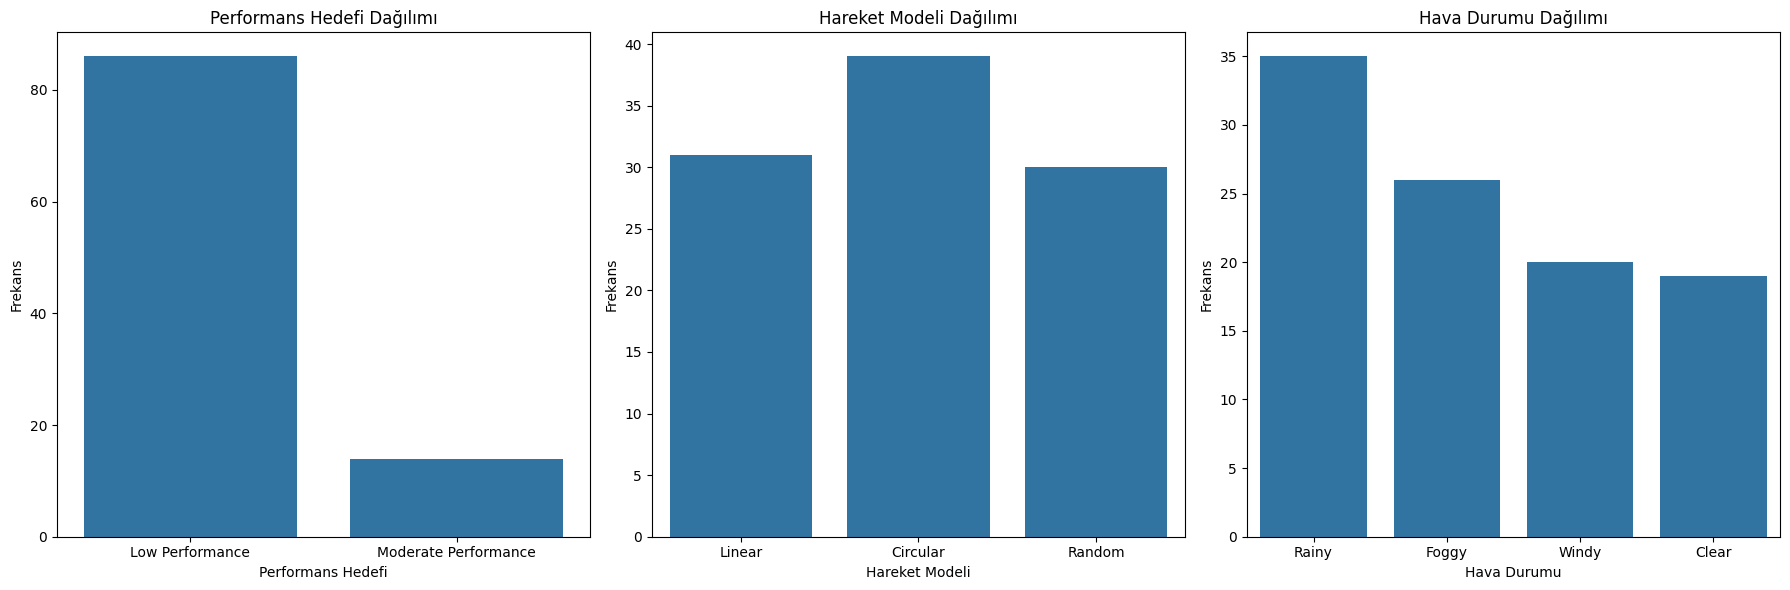

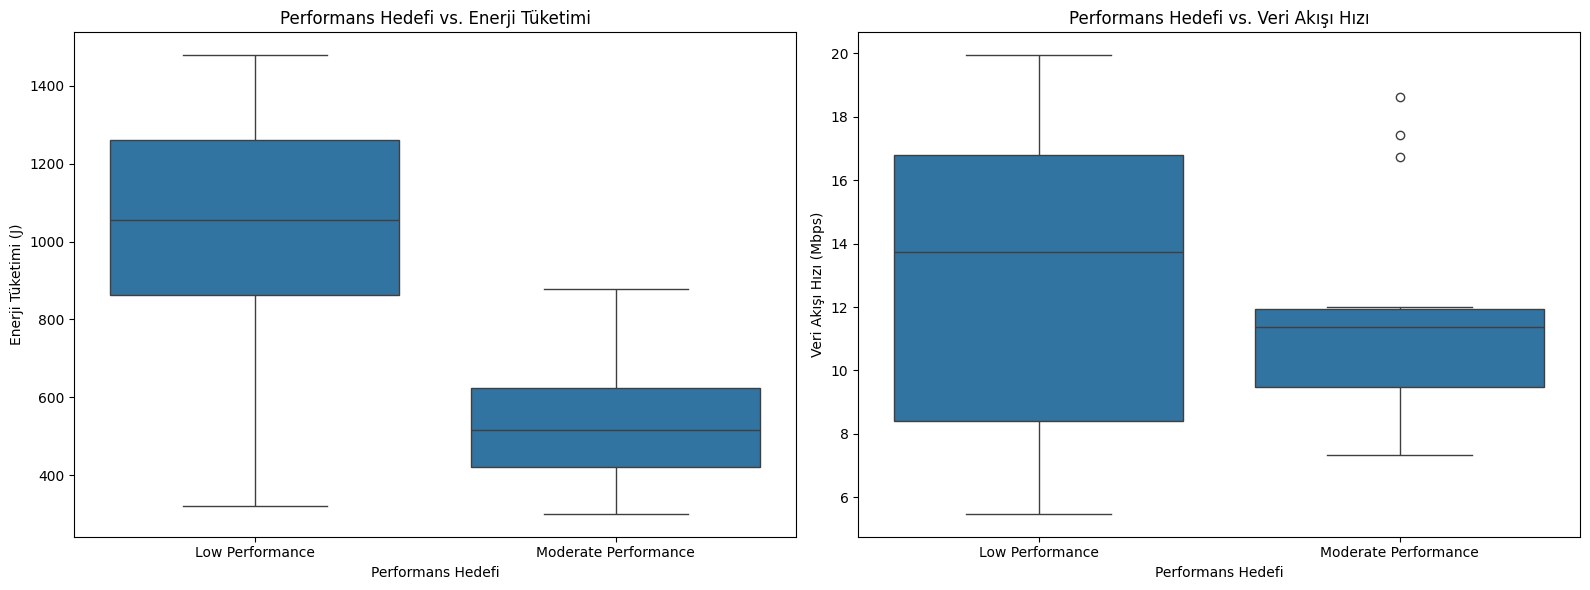

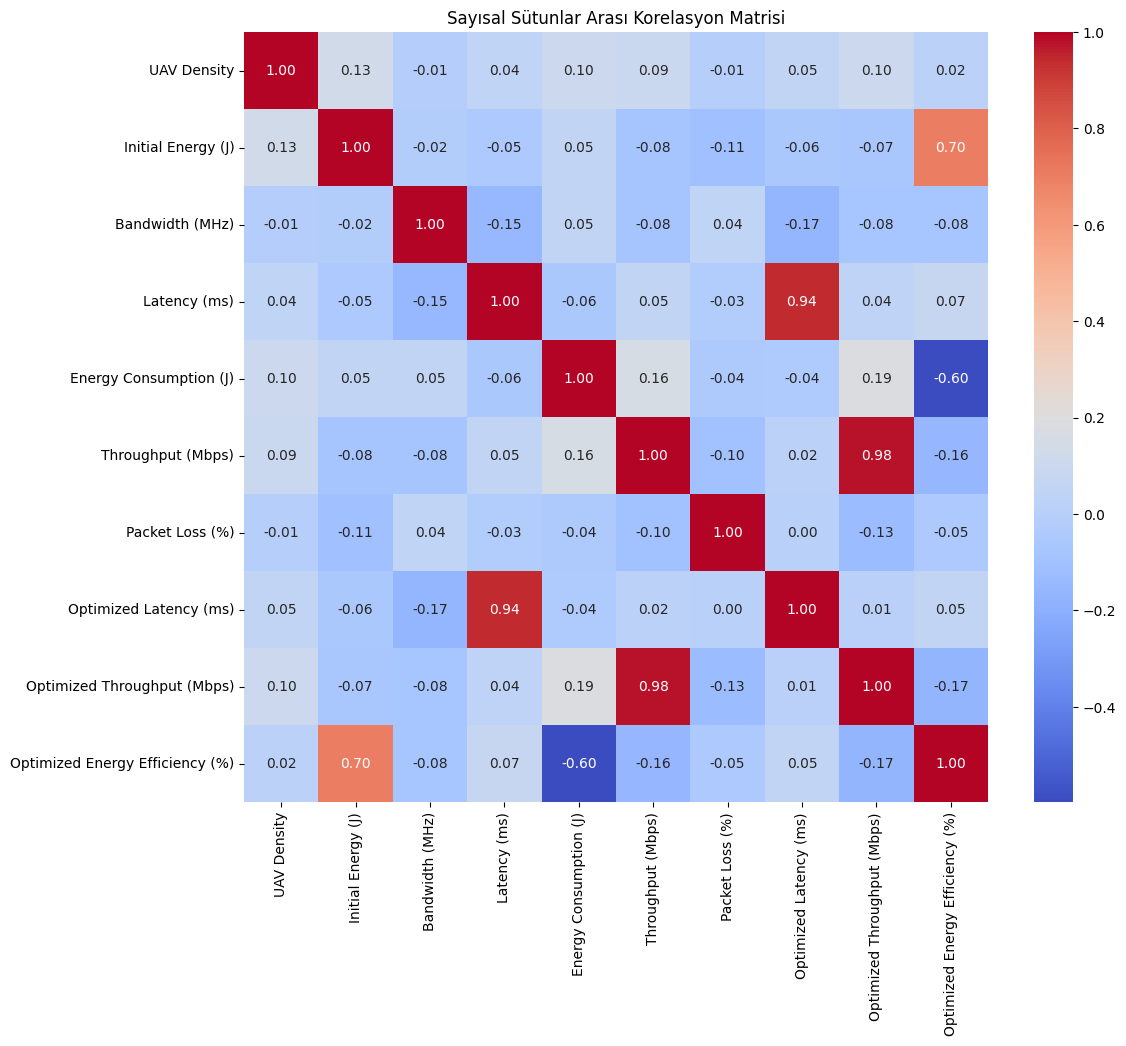

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Sayısal sütunlar için tanımlayıcı istatistikler:")
print(df.describe())
print("\n")

print("Kategorik sütunlar için frekans dağılımı:")
for col in ['Movement Pattern', 'Weather', 'Performance Target']:
    print(f"\nSütun: {col}")
    print(df[col].value_counts())

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(data=df, x='Performance Target', ax=axes[0])
axes[0].set_title('Performans Hedefi Dağılımı')
axes[0].set_xlabel('Performans Hedefi')
axes[0].set_ylabel('Frekans')

sns.countplot(data=df, x='Movement Pattern', ax=axes[1])
axes[1].set_title('Hareket Modeli Dağılımı')
axes[1].set_xlabel('Hareket Modeli')
axes[1].set_ylabel('Frekans')

sns.countplot(data=df, x='Weather', ax=axes[2])
axes[2].set_title('Hava Durumu Dağılımı')
axes[2].set_xlabel('Hava Durumu')
axes[2].set_ylabel('Frekans')

plt.tight_layout()
plt.savefig('categorical_distributions.png')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=df, x='Performance Target', y='Energy Consumption (J)', ax=axes[0])
axes[0].set_title('Performans Hedefi vs. Enerji Tüketimi')
axes[0].set_xlabel('Performans Hedefi')
axes[0].set_ylabel('Enerji Tüketimi (J)')

sns.boxplot(data=df, x='Performance Target', y='Throughput (Mbps)', ax=axes[1])
axes[1].set_title('Performans Hedefi vs. Veri Akışı Hızı')
axes[1].set_xlabel('Performans Hedefi')
axes[1].set_ylabel('Veri Akışı Hızı (Mbps)')

plt.tight_layout()
plt.savefig('numerical_target_relationship.png')
plt.show()

numerical_cols = df.select_dtypes(include=['float64', 'int64']).drop('Scenario ID', axis=1).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Sayısal Sütunlar Arası Korelasyon Matrisi')
plt.savefig('correlation_matrix.png')
plt.show()

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df['Latency_Improvement'] = df['Latency (ms)'] - df['Optimized Latency (ms)']
df['Throughput_Improvement'] = df['Optimized Throughput (Mbps)'] - df['Throughput (Mbps)']
df['Energy_Efficiency_Index'] = df['Optimized Throughput (Mbps)'] / df['Energy Consumption (J)']

print("Yeni oluşturulan özellikler:")
print(df[['Latency_Improvement', 'Throughput_Improvement', 'Energy_Efficiency_Index']].head())
print("\n")

X = df.drop('Performance Target', axis=1)
y = df['Performance Target']

X = pd.get_dummies(X, columns=['Movement Pattern', 'Weather'], drop_first=True)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X = X.drop('Scenario ID', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print("Veri setleri makine öğrenmesi için hazırlandı.")
print(f"Eğitim veri setinin boyutu (X_train): {X_train.shape}")
print(f"Test veri setinin boyutu (X_test): {X_test.shape}")
print(f"Eğitim hedef değişken setinin boyutu (y_train): {y_train.shape}")
print(f"Test hedef değişken setinin boyutu (y_test): {y_test.shape}")
print("\n")

print("Hazırlanan eğitim veri setinin ilk 5 satırı:")
print(X_train.head())

Yeni oluşturulan özellikler:
   Latency_Improvement  Throughput_Improvement  Energy_Efficiency_Index
0            46.840531                4.394880                 0.047833
1            46.000697                6.252845                 0.017786
2            36.416009                1.730758                 0.027875
3            39.691922                3.222818                 0.015249
4            69.014551                5.603455                 0.024394


Veri setleri makine öğrenmesi için hazırlandı.
Eğitim veri setinin boyutu (X_train): (80, 18)
Test veri setinin boyutu (X_test): (20, 18)
Eğitim hedef değişken setinin boyutu (y_train): (80,)
Test hedef değişken setinin boyutu (y_test): (20,)


Hazırlanan eğitim veri setinin ilk 5 satırı:
    UAV Density  Initial Energy (J)  Bandwidth (MHz)  Latency (ms)  \
86     1.127621           -0.477912        -0.173316     -0.139972   
13    -0.603310           -0.403176         1.503652     -1.224027   
82     1.630799            1.341970  

--- Modeli Eğitme ve Değerlendirme: Logistic Regression ---
Doğruluk Oranı: 0.8500

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.50      0.33      0.40         3

    accuracy                           0.85        20
   macro avg       0.69      0.64      0.66        20
weighted avg       0.83      0.85      0.84        20



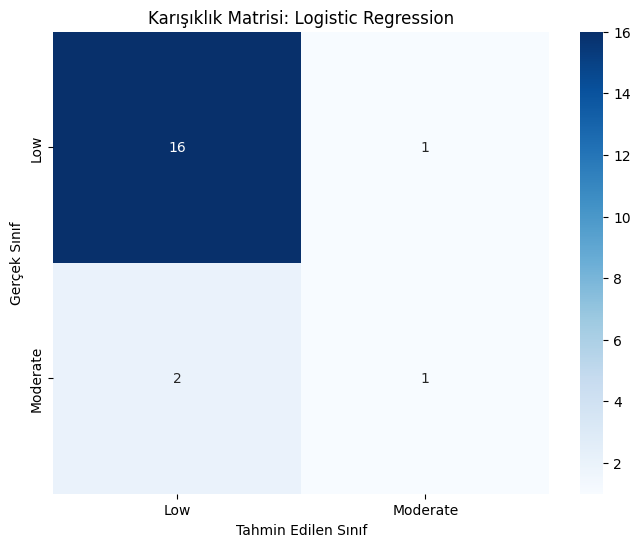

--- Modeli Eğitme ve Değerlendirme: K-Nearest Neighbors ---
Doğruluk Oranı: 0.9000

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.33      0.50         3

    accuracy                           0.90        20
   macro avg       0.95      0.67      0.72        20
weighted avg       0.91      0.90      0.88        20



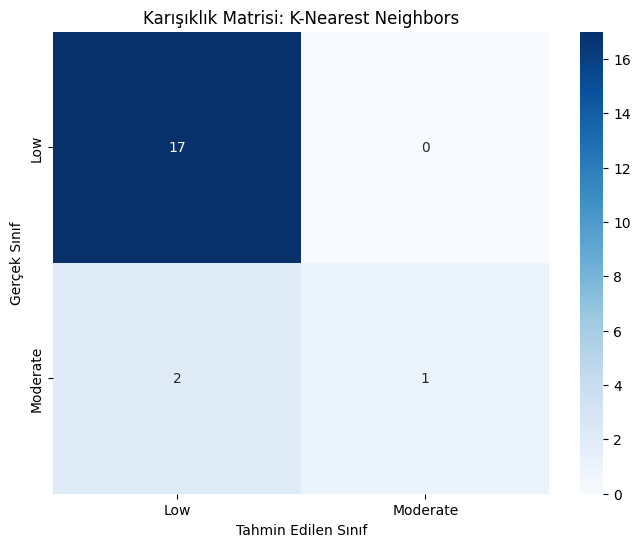

--- Modeli Eğitme ve Değerlendirme: Support Vector Machine ---
Doğruluk Oranı: 0.8500

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       0.00      0.00      0.00         3

    accuracy                           0.85        20
   macro avg       0.42      0.50      0.46        20
weighted avg       0.72      0.85      0.78        20



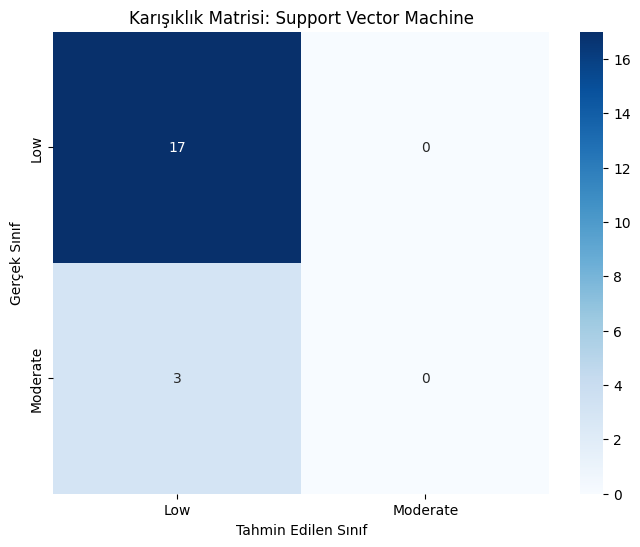

--- Modeli Eğitme ve Değerlendirme: Decision Tree ---
Doğruluk Oranı: 0.8500

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.50      0.67      0.57         3

    accuracy                           0.85        20
   macro avg       0.72      0.77      0.74        20
weighted avg       0.87      0.85      0.86        20



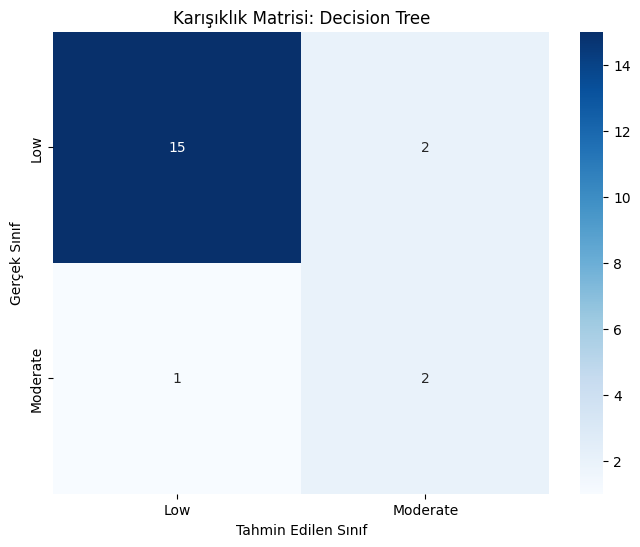

--- Modeli Eğitme ve Değerlendirme: Random Forest ---
Doğruluk Oranı: 0.9000

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.67      0.67      0.67         3

    accuracy                           0.90        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.90      0.90      0.90        20



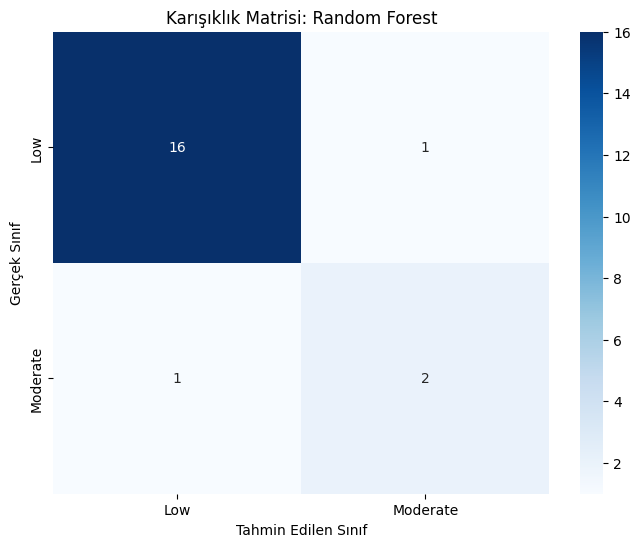

--- Modeli Eğitme ve Değerlendirme: Gradient Boosting ---
Doğruluk Oranı: 0.9000

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.67      0.67      0.67         3

    accuracy                           0.90        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.90      0.90      0.90        20



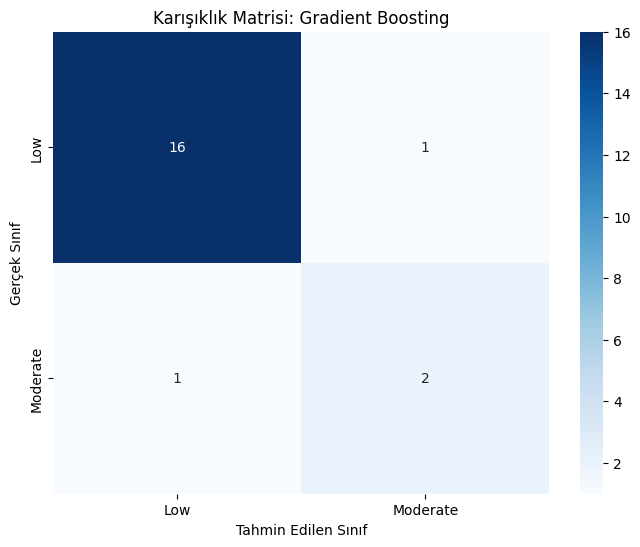

--- Modeli Eğitme ve Değerlendirme: AdaBoost ---
Doğruluk Oranı: 0.7500

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.25      0.33      0.29         3

    accuracy                           0.75        20
   macro avg       0.56      0.58      0.57        20
weighted avg       0.78      0.75      0.76        20



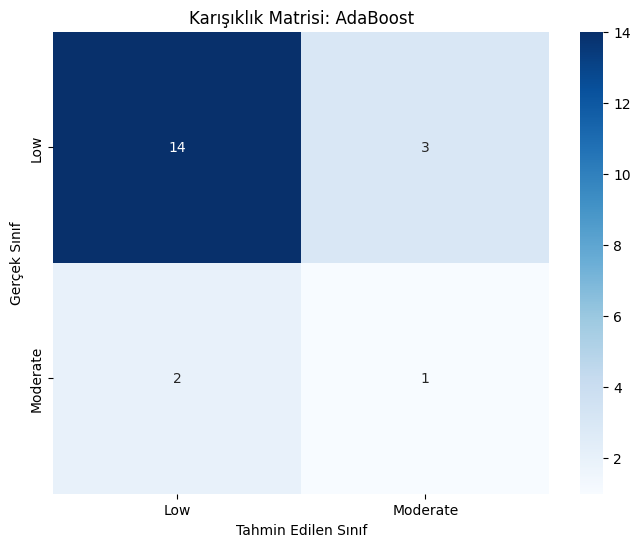


--- Model Karşılaştırma Sonuçları ---
                        Accuracy  Precision (0)  Recall (0)  F1-score (0)  \
Logistic Regression         0.85       0.888889    0.941176      0.914286   
K-Nearest Neighbors         0.90       0.894737    1.000000      0.944444   
Support Vector Machine      0.85       0.850000    1.000000      0.918919   
Decision Tree               0.85       0.937500    0.882353      0.909091   
Random Forest               0.90       0.941176    0.941176      0.941176   
Gradient Boosting           0.90       0.941176    0.941176      0.941176   
AdaBoost                    0.75       0.875000    0.823529      0.848485   

                        Precision (1)  Recall (1)  F1-score (1)  
Logistic Regression          0.500000    0.333333      0.400000  
K-Nearest Neighbors          1.000000    0.333333      0.500000  
Support Vector Machine       0.000000    0.000000      0.000000  
Decision Tree                0.500000    0.666667      0.571429  
Random Forest 

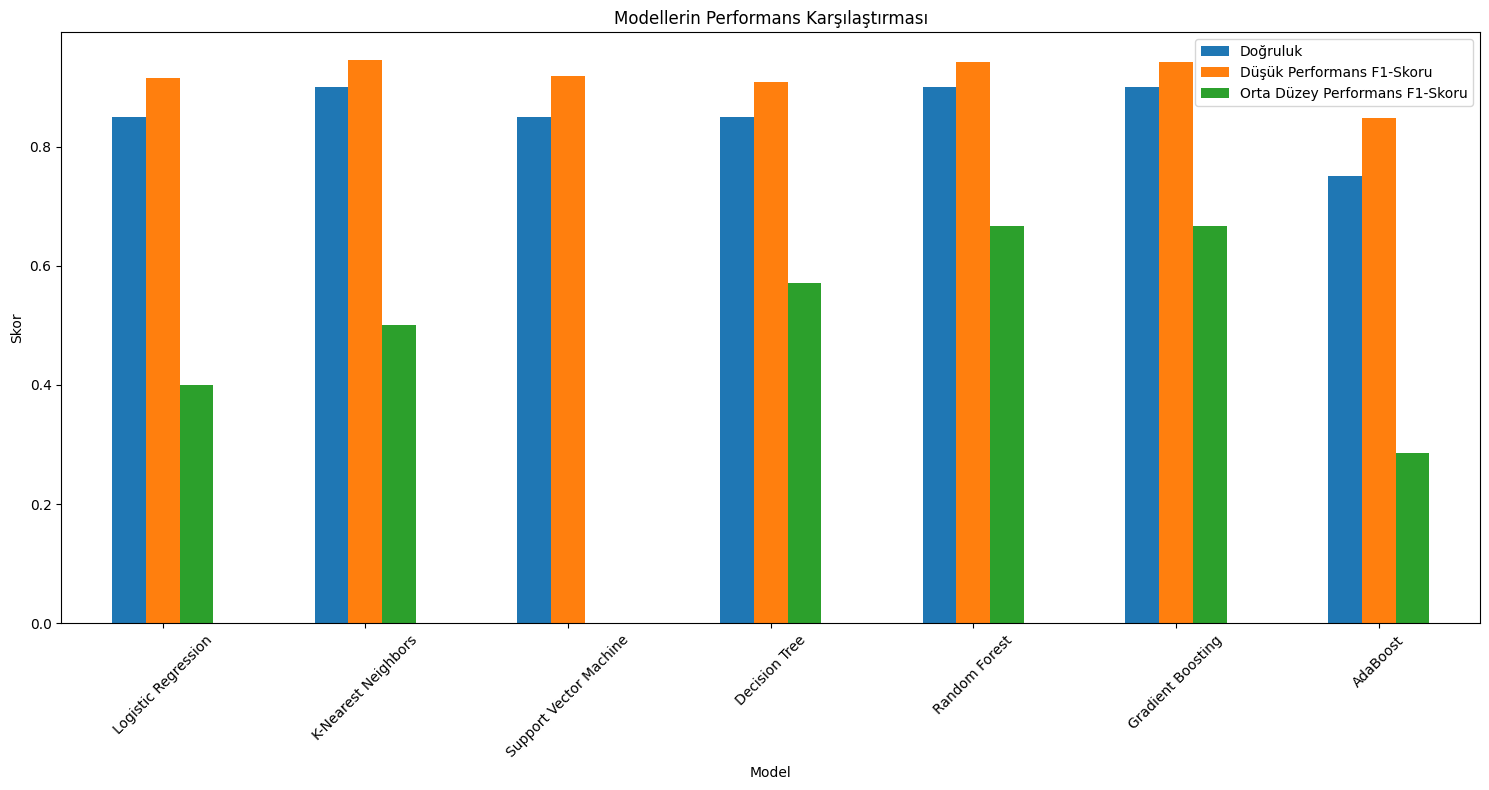

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"--- Modeli Eğitme ve Değerlendirme: {name} ---")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'Accuracy': accuracy,
        'Precision (0)': report['0']['precision'],
        'Recall (0)': report['0']['recall'],
        'F1-score (0)': report['0']['f1-score'],
        'Precision (1)': report['1']['precision'],
        'Recall (1)': report['1']['recall'],
        'F1-score (1)': report['1']['f1-score']
    }

    print(f"Doğruluk Oranı: {accuracy:.4f}")
    print("\nSınıflandırma Raporu:")
    print(classification_report(y_test, y_pred, zero_division=0))

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Moderate'], yticklabels=['Low', 'Moderate'])
    plt.title(f'Karışıklık Matrisi: {name}')
    plt.xlabel('Tahmin Edilen Sınıf')
    plt.ylabel('Gerçek Sınıf')
    plt.savefig(f'confusion_matrix_{name.replace(" ", "_").lower()}.png')
    plt.show()

results_df = pd.DataFrame(results).T
print("\n--- Model Karşılaştırma Sonuçları ---")
print(results_df)

results_df[['Accuracy', 'F1-score (0)', 'F1-score (1)']].plot(kind='bar', figsize=(15, 8))
plt.title('Modellerin Performans Karşılaştırması')
plt.ylabel('Skor')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(['Doğruluk', 'Düşük Performans F1-Skoru', 'Orta Düzey Performans F1-Skoru'])
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

--- 1. SMOTE ile Sınıf Dengesizliğini Giderme ---
SMOTE öncesi eğitim setindeki 'Moderate Performance' örnek sayısı: 11
SMOTE öncesi eğitim seti boyutu: (80, 18)
SMOTE sonrası eğitim setindeki 'Moderate Performance' örnek sayısı: 69
SMOTE sonrası eğitim seti boyutu: (138, 18)

--- 2. Dengelenmiş Veri Üzerinde Modelleri Eğitme ---

--- Modeli Eğitme ve Değerlendirme: Logistic Regression (SMOTE) ---
Doğruluk Oranı: 0.9000

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.67      0.67      0.67         3

    accuracy                           0.90        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.90      0.90      0.90        20



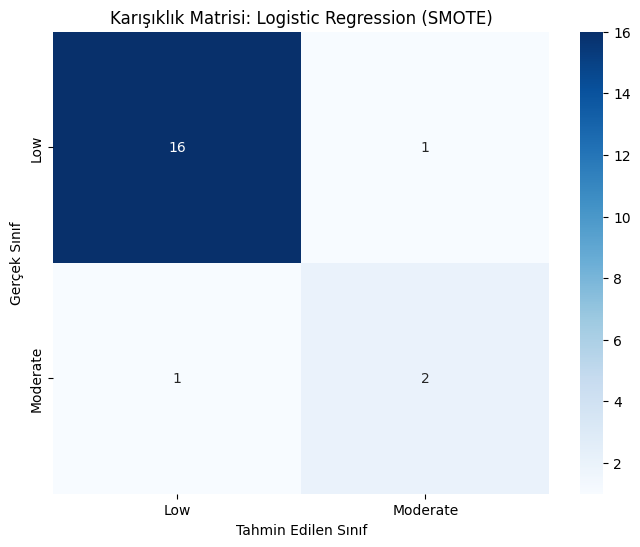


--- Modeli Eğitme ve Değerlendirme: Decision Tree (SMOTE) ---
Doğruluk Oranı: 0.8500

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.50      0.67      0.57         3

    accuracy                           0.85        20
   macro avg       0.72      0.77      0.74        20
weighted avg       0.87      0.85      0.86        20



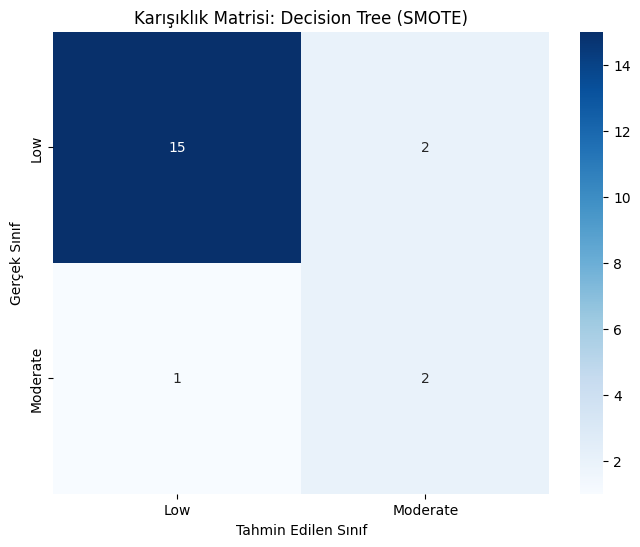


--- Modeli Eğitme ve Değerlendirme: Random Forest (SMOTE) ---
Doğruluk Oranı: 0.8000

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.93      0.82      0.88        17
           1       0.40      0.67      0.50         3

    accuracy                           0.80        20
   macro avg       0.67      0.75      0.69        20
weighted avg       0.85      0.80      0.82        20



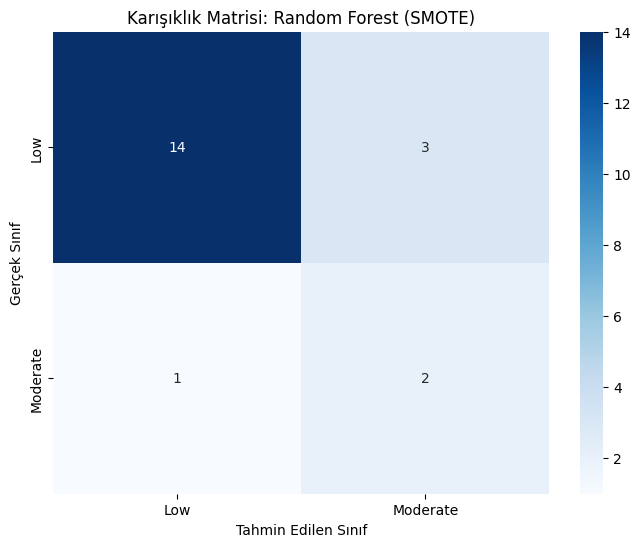


--- Modeli Eğitme ve Değerlendirme: Gradient Boosting (SMOTE) ---
Doğruluk Oranı: 0.9000

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.67      0.67      0.67         3

    accuracy                           0.90        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.90      0.90      0.90        20



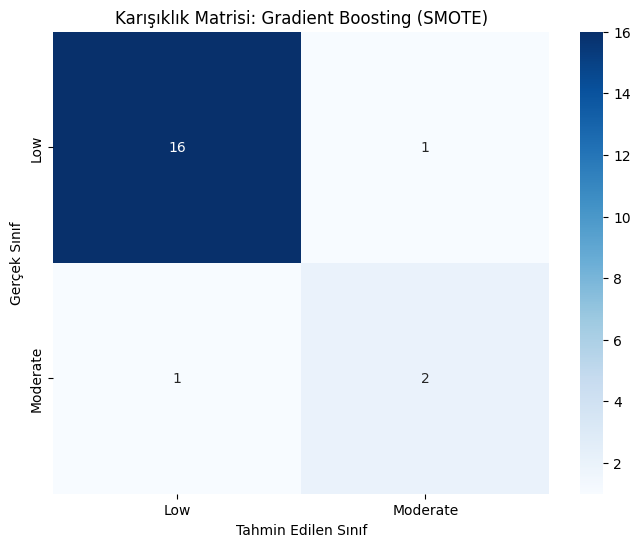


--- Modeli Eğitme ve Değerlendirme: K-Nearest Neighbors (SMOTE) ---
Doğruluk Oranı: 0.8500

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.50      1.00      0.67         3

    accuracy                           0.85        20
   macro avg       0.75      0.91      0.78        20
weighted avg       0.93      0.85      0.87        20



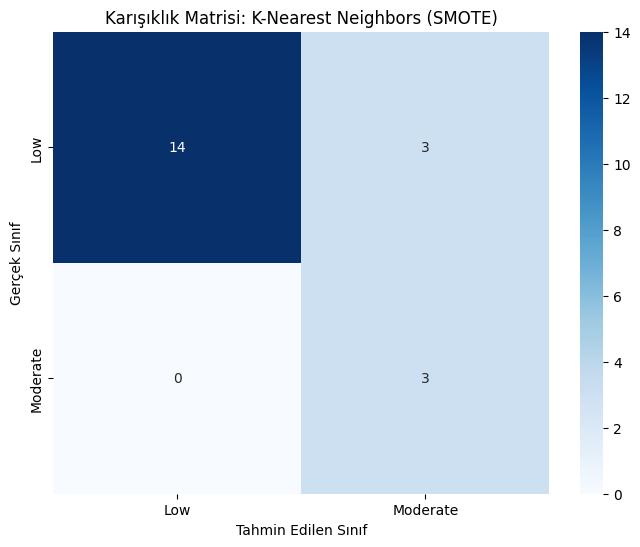


--- 3. SMOTE Öncesi ve Sonrası Model Performans Karşılaştırması ---

Karşılaştırma Tablosu:
                             Accuracy  Precision (1)  Recall (1)  \
Logistic Regression              0.85           0.50        0.33   
K-Nearest Neighbors              0.90           1.00        0.33   
Support Vector Machine           0.85           0.00        0.00   
Decision Tree                    0.85           0.50        0.67   
Random Forest                    0.90           0.67        0.67   
Logistic Regression (SMOTE)       NaN            NaN         NaN   
Decision Tree (SMOTE)             NaN            NaN         NaN   
Random Forest (SMOTE)             NaN            NaN         NaN   
Gradient Boosting (SMOTE)         NaN            NaN         NaN   
K-Nearest Neighbors (SMOTE)       NaN            NaN         NaN   

                             F1-score (1)  Accuracy (SMOTE)  \
Logistic Regression                  0.40               NaN   
K-Nearest Neighbors             

In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Not: Bu kod, önceki adımlarda hazırlanmış X_train, X_test, y_train ve y_test verilerinin
# bellekte olduğunu varsaymaktadır.

print("--- 1. SMOTE ile Sınıf Dengesizliğini Giderme ---")

# SMOTE öncesi sınıf dağılımı
print("SMOTE öncesi eğitim setindeki 'Moderate Performance' örnek sayısı:", np.sum(y_train == 1))
print("SMOTE öncesi eğitim seti boyutu:", X_train.shape)

# SMOTE modelini oluşturma ve uygulama
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# SMOTE sonrası sınıf dağılımı
print("SMOTE sonrası eğitim setindeki 'Moderate Performance' örnek sayısı:", np.sum(y_train_res == 1))
print("SMOTE sonrası eğitim seti boyutu:", X_train_res.shape)


# --- 2. Dengelenmiş Veri Üzerinde Modelleri Yeniden Eğitme ve Karşılaştırma ---
print("\n--- 2. Dengelenmiş Veri Üzerinde Modelleri Eğitme ---")

models = {
    'Logistic Regression (SMOTE)': LogisticRegression(random_state=42),
    'Decision Tree (SMOTE)': DecisionTreeClassifier(random_state=42),
    'Random Forest (SMOTE)': RandomForestClassifier(random_state=42),
    'Gradient Boosting (SMOTE)': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors (SMOTE)': KNeighborsClassifier()
}

results_smote = {}

for name, model in models.items():
    print(f"\n--- Modeli Eğitme ve Değerlendirme: {name} ---")

    # Modeli dengelenmiş veri üzerinde eğit
    model.fit(X_train_res, y_train_res)
    # Tahminleri orijinal test verisi üzerinde yap
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    results_smote[name] = {
        'Accuracy': accuracy,
        'Precision (0)': report['0']['precision'],
        'Recall (0)': report['0']['recall'],
        'F1-score (0)': report['0']['f1-score'],
        'Precision (1)': report['1']['precision'],
        'Recall (1)': report['1']['recall'],
        'F1-score (1)': report['1']['f1-score']
    }

    print(f"Doğruluk Oranı: {accuracy:.4f}")
    print("\nSınıflandırma Raporu:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Moderate'], yticklabels=['Low', 'Moderate'])
    plt.title(f'Karışıklık Matrisi: {name}')
    plt.xlabel('Tahmin Edilen Sınıf')
    plt.ylabel('Gerçek Sınıf')
    plt.show()


# --- 3. Sonuçları Karşılaştırma ---
print("\n--- 3. SMOTE Öncesi ve Sonrası Model Performans Karşılaştırması ---")

# SMOTE öncesi sonuçları (kod3'ten)
results_before = pd.DataFrame({
    'Accuracy': [0.85, 0.90, 0.85, 0.85, 0.90],
    'Precision (1)': [0.50, 1.00, 0.00, 0.50, 0.67],
    'Recall (1)': [0.33, 0.33, 0.00, 0.67, 0.67],
    'F1-score (1)': [0.40, 0.50, 0.00, 0.57, 0.67]
}, index=['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Decision Tree', 'Random Forest'])

results_after = pd.DataFrame(results_smote).T
# Sütun isimlerini kısalt
results_after_renamed = results_after[['Accuracy', 'Precision (1)', 'Recall (1)', 'F1-score (1)']].rename(
    columns={
        'Accuracy': 'Accuracy (SMOTE)',
        'Precision (1)': 'Precision (1) (SMOTE)',
        'Recall (1)': 'Recall (1) (SMOTE)',
        'F1-score (1)': 'F1-score (1) (SMOTE)'
    }
)

comparison_df = pd.concat([results_before, results_after_renamed], axis=1)

print("\nKarşılaştırma Tablosu:")
print(comparison_df)

Veri Keşfi ve Görselleştirme
Bu bölüm, veri setinin ilk anlaşılması ve görsel olarak incelenmesi için kullanılır.

Tanımlayıcı İstatistikler: Sayısal sütunların (örneğin, ortalama, standart sapma, minimum, maksimum değerler) özet istatistiklerini hesaplar ve yazdırır. Bu, veri dağılımı hakkında hızlı bir genel bakış sağlar.

Kategorik Sütun Analizi: 'Movement Pattern', 'Weather' ve 'Performance Target' gibi kategorik sütunların her biri için değer frekanslarını (kaç kez tekrar ettiklerini) sayar ve gösterir. Bu, her kategorinin veri setindeki dağılımını anlamaya yardımcı olur.

Kategorik Değişkenlerin Görselleştirilmesi: seaborn.countplot kullanarak 'Performance Target', 'Movement Pattern' ve 'Weather' sütunlarının dağılımlarını çubuk grafiklerle görselleştirir. Bu grafikler, her kategorinin veri setindeki oranını ve dağılımını kolayca görmeyi sağlar. Oluşturulan grafikler categorical_distributions.png olarak kaydedilir.

Sayısal Özellikler ve Hedef Değişken İlişkisi: seaborn.boxplot kullanarak 'Performance Target' ile 'Energy Consumption (J)' ve 'Throughput (Mbps)' arasındaki ilişkileri kutu grafikleriyle görselleştirir. Bu grafikler, farklı performans hedeflerine sahip senaryoların enerji tüketimi ve veri akışı hızı açısından nasıl farklılaştığını gösterir. Oluşturulan grafikler numerical_target_relationship.png olarak kaydedilir.

Korelasyon Matrisi: Sayısal sütunlar arasındaki korelasyonu (ilişki gücünü) hesaplar ve seaborn.heatmap kullanarak bir ısı haritası olarak görselleştirir. Bu matris, hangi sayısal özelliklerin birbirleriyle güçlü bir şekilde ilişkili olduğunu ve dolayısıyla modelde potansiyel olarak çakışan bilgileri gösterebilir. Oluşturulan grafik correlation_matrix.png olarak kaydedilir.

🛠️ Özellik Mühendisliği
Bu kısım, mevcut verilerden yeni ve daha anlamlı özellikler oluşturmayı amaçlar.

Gecikme İyileştirmesi (Latency_Improvement): Optimize edilmiş gecikme süresinin orijinal gecikme süresinden çıkarılmasıyla hesaplanır. Bu, optimizasyonun gecikme üzerindeki etkisini doğrudan ölçer.

Veri Akışı Hızı İyileştirmesi (Throughput_Improvement): Optimize edilmiş veri akışı hızının orijinal veri akışı hızından çıkarılmasıyla hesaplanır. Bu, optimizasyonun veri akışı hızı üzerindeki etkisini gösterir.

Enerji Verimliliği Endeksi (Energy_Efficiency_Index): Optimize edilmiş veri akışı hızının enerji tüketimine bölünmesiyle hesaplanır. Bu, sistemin belirli bir veri akışı hızını ne kadar enerji verimli bir şekilde sağladığını gösteren bir ölçüttür.

⚙️ Makine Öğrenimi Modeli İçin Veri Hazırlığı
Bu bölüm, veri setini makine öğrenimi modellerinin anlayabileceği bir formata dönüştürür.

Özellik ve Hedef Değişken Ayırma: Veri seti, tahmin edilecek hedef değişken (Performance Target) ve bu tahmini yapmak için kullanılacak özellikler (geri kalan sütunlar) olarak ikiye ayrılır (X ve y).

Kategorik Özelliklerin Dönüştürülmesi: 'Movement Pattern' ve 'Weather' gibi kategorik sütunlar, makine öğrenimi modellerinin işleyebileceği sayısal bir formata dönüştürülür. Bunun için One-Hot Encoding yöntemi kullanılır. Bu, her bir kategorik değer için yeni bir ikili (0 veya 1) sütun oluşturur.

Hedef Değişkenin Kodlanması: 'Performance Target' gibi hedef değişken de LabelEncoder kullanılarak sayısal değerlere dönüştürülür (örneğin, 'Low' 0, 'Moderate' 1 olabilir).

Gereksiz Sütunların Bırakılması: 'Scenario ID' gibi model için anlamsız olan sütunlar veri setinden çıkarılır.

Eğitim ve Test Setlerine Ayırma: Veri seti, modelin eğitileceği bir eğitim seti (X_train, y_train) ve modelin performansının değerlendirileceği bağımsız bir test seti (X_test, y_test) olarak ayrılır. test_size=0.2 ile verinin %20'si test için ayrılır ve stratify=y_encoded ile hedef değişkenin dağılımı eğitim ve test setlerinde korunur.

Sayısal Özelliklerin Ölçeklendirilmesi: StandardScaler kullanılarak sayısal özellikler ölçeklendirilir. Bu işlem, farklı özelliklerin farklı değer aralıklarına sahip olmasından kaynaklanan sorunları önler ve çoğu makine öğrenimi algoritmasının daha iyi performans göstermesine yardımcı olur.

🤖 Model Eğitimi ve Değerlendirme
Bu bölüm, çeşitli makine öğrenimi modellerini eğitir ve performanslarını ölçer.

Model Tanımlamaları: Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Decision Tree, Random Forest, Gradient Boosting, ve AdaBoost gibi yedi farklı sınıflandırma modeli tanımlanır.

Model Eğitimi ve Tahmini: Her bir model, eğitim veri seti (X_train, y_train) üzerinde eğitilir ve ardından test veri seti (X_test) üzerinde tahminler (y_pred) yapar.

Performans Metrikleri: Her model için aşağıdaki performans metrikleri hesaplanır:

Doğruluk Oranı (accuracy_score): Modelin doğru tahminlerinin toplam tahminlere oranı.

Sınıflandırma Raporu (classification_report): Her sınıf için kesinlik (precision), geri çağırma (recall) ve F1-skoru gibi daha detaylı metrikleri sağlar.

Karışıklık Matrisi (confusion_matrix): Modelin doğru ve yanlış tahminlerini gösteren bir tablo. Bu matris, modelin hangi sınıfları karıştırma eğiliminde olduğunu anlamaya yardımcı olur. Her model için karışıklık matrisi görselleştirilir ve bir PNG dosyası olarak kaydedilir.

Sonuçların Saklanması: Her modelin performans metrikleri bir sözlükte (results) saklanır.

📈 Model Karşılaştırması
Bu bölüm, eğitilen modellerin performanslarını bir araya getirir ve görsel olarak karşılaştırır.

Sonuç DataFrame'i: results sözlüğündeki veriler, kolay karşılaştırma için bir pandas.DataFrame'e dönüştürülür.

Görsel Karşılaştırma: Modellerin doğruluk oranları ve F1-skorları (hem 'Low' hem de 'Moderate' sınıfları için) bir çubuk grafikte görselleştirilir. Bu grafik, hangi modelin belirli metriklerde daha iyi performans gösterdiğini hızlıca görmeyi sağlar. Oluşturulan grafik model_comparison.png olarak kaydedilir.